# 該API只能查找當天股價，無法查詢歷史股價

In [2]:
# 引入requests庫
import requests  
# 定義API的URL
url = 'https://openapi.twse.com.tw/v1/exchangeReport/STOCK_DAY_ALL'  
# 發送GET請求
res = requests.get(url)  
res

<Response [200]>

In [3]:
import json

jsondata = json.loads(res.text)
jsondata

[{'Code': '0050',
  'Name': '元大台灣50',
  'TradeVolume': '4455951',
  'TradeValue': '830033644',
  'OpeningPrice': '185.30',
  'HighestPrice': '187.40',
  'LowestPrice': '184.65',
  'ClosingPrice': '186.45',
  'Change': '1.1500',
  'Transaction': '7487'},
 {'Code': '0051',
  'Name': '元大中型100',
  'TradeVolume': '44821',
  'TradeValue': '3792483',
  'OpeningPrice': '84.15',
  'HighestPrice': '84.80',
  'LowestPrice': '84.15',
  'ClosingPrice': '84.45',
  'Change': '0.3000',
  'Transaction': '232'},
 {'Code': '0052',
  'Name': '富邦科技',
  'TradeVolume': '684373',
  'TradeValue': '126265508',
  'OpeningPrice': '183.45',
  'HighestPrice': '185.40',
  'LowestPrice': '182.80',
  'ClosingPrice': '184.80',
  'Change': '1.5500',
  'Transaction': '1233'},
 {'Code': '0053',
  'Name': '元大電子',
  'TradeVolume': '8375',
  'TradeValue': '851299',
  'OpeningPrice': '101.25',
  'HighestPrice': '102.05',
  'LowestPrice': '101.20',
  'ClosingPrice': '101.85',
  'Change': '0.7000',
  'Transaction': '112'},
 {'C

In [4]:
# 引入pandas庫
import pandas as pd  
# 將JSON數據轉換為DataFrame
df = pd.DataFrame(jsondata)
# 將"Code"列設置為索引
df.set_index("Code", inplace=True)
# 將空字符串替換為'0'
df.replace('', '0', inplace=True)
# 將除了"Name"列以外的所有列轉換為浮點數
df[df.columns.difference(['Name'])] = df[df.columns.difference(['Name'])].astype(float)
# 顯示DataFrame
df

,Name,TradeVolume,TradeValue,OpeningPrice,HighestPrice,LowestPrice,ClosingPrice,Change,Transaction
Code,,,,,,,,,
0050,元大台灣50,4455951.0,8.300336e+08,185.30,187.40,184.65,186.45,1.15,7487.0
0051,元大中型100,44821.0,3.792483e+06,84.15,84.80,84.15,84.45,0.30,232.0
0052,富邦科技,684373.0,1.262655e+08,183.45,185.40,182.80,184.80,1.55,1233.0
0053,元大電子,8375.0,8.512990e+05,101.25,102.05,101.20,101.85,0.70,112.0
0055,元大MSCI金融,116637.0,3.210805e+06,27.36,27.69,27.36,27.55,0.25,263.0
...,...,...,...,...,...,...,...,...,...
9944,新麗,126757.0,2.831472e+06,22.35,22.50,22.20,22.20,-0.15,72.0
9945,潤泰新,6552762.0,2.872100e+08,43.50,44.30,43.45,43.60,0.30,4080.0
9946,三發地產,1178769.0,4.876641e+07,42.10,42.10,41.10,41.10,-0.80,923.0


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

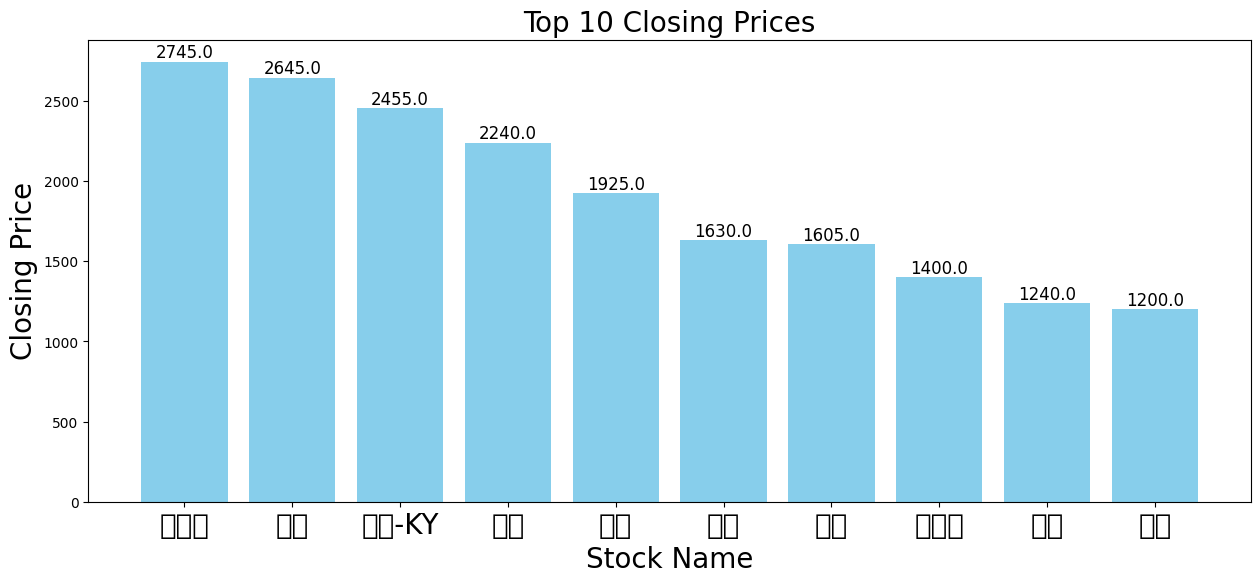

In [7]:
# 按收盤價排序並選取前10大收盤價的股票
top10_closing = df.nlargest(10, 'ClosingPrice')

# 視覺化
plt.figure(figsize=(15, 6))
bars = plt.bar(top10_closing['Name'], top10_closing['ClosingPrice'], color='skyblue')
plt.title('Top 10 Closing Prices',fontsize=20)
plt.xlabel('Stock Name',fontsize=20)
plt.ylabel('Closing Price',fontsize=20)
plt.xticks(fontsize=20)
# 在每個條形圖上顯示對應的股價
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.show()